In [66]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from helper_functions import *

tf.random.set_seed(1)

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json

data = pd.read_csv("../last_30_days.csv", header=0, index_col=0)
data = data.sort_values('date')

#### Train-Test split for time-series ####
test_ratio = 0.2
training_ratio = 1 - test_ratio
window_sizes = [50, 50, 200]

layer_units, optimizer = 50, 'adam' 
cur_epochs = 50
cur_batch_size = 20

cur_LSTM_pars = {'units': layer_units, 
                    'optimizer': optimizer, 
                    'batch_size': cur_batch_size, 
                    'epochs': cur_epochs
                    }
    
# scale 
scaler = StandardScaler()
data['close'] = scaler.fit_transform(data[['close']])

X_train, y_train, X_test, y_test = split_data_2(data, training_ratio, window_sizes[0])

### Build a LSTM model and log model summary to Neptune ###    
def Run_LSTM(X_train, layer_units=50):     

    model = Sequential(
    [
        Input(shape=(X_train.shape[1], 1)),

        LSTM(units=layer_units, return_sequences=True),
        Dropout(0.75),
        LSTM(units=layer_units),
        Dropout(0.75),

        Dense(2, activation='softmax')
    ]
)
    # Compile the LSTM neural net
    model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])
    return model

model = Run_LSTM(X_train, layer_units=layer_units)

history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size, 
                    verbose=1, validation_split=0.1, shuffle=True)


Epoch 1/50


2022-12-13 15:09:20.293358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:20.579858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:20.876021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:21.172872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:21.496052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5470

2022-12-13 15:09:24.693594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:24.805102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:09:24.930385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 6s 94ms/step - loss: 0.6945 - accuracy: 0.5470 - val_loss: 0.7182 - val_accuracy: 0.4176
Epoch 2/50
41/41 [==============================] - 2s 58ms/step - loss: 0.6827 - accuracy: 0.5702 - val_loss: 0.7226 - val_accuracy: 0.4176
Epoch 3/50
41/41 [==============================] - 2s 43ms/step - loss: 0.6809 - accuracy: 0.5910 - val_loss: 0.7313 - val_accuracy: 0.4176
Epoch 4/50
41/41 [==============================] - 2s 42ms/step - loss: 0.6773 - accuracy: 0.5763 - val_loss: 0.7345 - val_accuracy: 0.4176
Epoch 5/50
41/41 [==============================] - 2s 42ms/step - loss: 0.6766 - accuracy: 0.5775 - val_loss: 0.7291 - val_accuracy: 0.4176
Epoch 6/50
41/41 [==============================] - 2s 44ms/step - loss: 0.6744 - accuracy: 0.5897 - val_loss: 0.7390 - val_accuracy: 0.4176
Epoch 7/50
41/41 [==============================] - 2s 42ms/step - loss: 0.6678 - accuracy: 0.6044 - val_loss: 0.7130 - val_accuracy: 0.4176
Epoch 8/50
41/41 [======

In [67]:
predicted_price_ = model.predict(X_test)
print(predicted_price_.argmax(axis=-1))

model.evaluate(X_test, y_test, verbose=0)


2022-12-13 15:10:49.517866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:10:49.650688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 15:10:49.901735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 42ms/step
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[0.7762797474861145, 0.5916666984558105]

In [65]:
y_test

array([False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


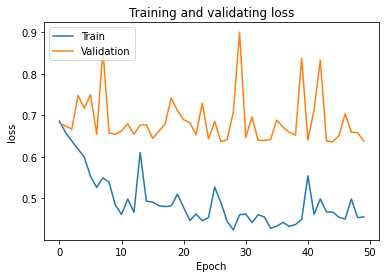

In [46]:
def plot_loss(data):
    print(data.history.keys())
    plt.plot(data.history['loss'], label='Train')
    plt.plot(data.history['val_loss'], label='Validation')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.title('Training and validating loss')
    plt.legend()
    plt.show()
    
plot_loss(history)

In [54]:
predicted_price_

array([[0.537877  , 0.46212304],
       [0.5444345 , 0.4555655 ],
       [0.5612476 , 0.4387524 ],
       [0.56906885, 0.43093118],
       [0.58576214, 0.41423786],
       [0.59603935, 0.40396065],
       [0.60439456, 0.39560544],
       [0.62322813, 0.3767719 ],
       [0.64888924, 0.35111073],
       [0.68415874, 0.31584123],
       [0.6947762 , 0.30522382],
       [0.6752606 , 0.32473943],
       [0.6517087 , 0.34829134],
       [0.6233291 , 0.37667096],
       [0.6032683 , 0.3967317 ],
       [0.58183736, 0.41816264],
       [0.5548417 , 0.44515827],
       [0.53642964, 0.46357042],
       [0.5209174 , 0.47908258],
       [0.50214756, 0.49785247],
       [0.47639692, 0.5236031 ],
       [0.45688945, 0.5431106 ],
       [0.4370661 , 0.5629339 ],
       [0.40875146, 0.5912486 ],
       [0.37320438, 0.6267956 ],
       [0.34853986, 0.6514602 ],
       [0.34533945, 0.6546605 ],
       [0.3728328 , 0.62716717],
       [0.417653  , 0.5823471 ],
       [0.48722202, 0.512778  ],
       [0.